Data visualization project on medium with John Hopkins Data

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [23]:
df = pd.read_csv(url,delimiter=',',header='infer',index_col=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 105 entries, Province/State to 5/1/20
dtypes: float64(2), int64(101), object(2)
memory usage: 218.3+ KB


In [25]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,40,42,43,47,50,57,58,60,64,68
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,27,27,27,27,28,28,30,30,31,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,402,407,415,419,425,432,437,444,450,453
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,37,37,40,40,40,40,41,42,42,43
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [5]:
len(df['Province/State'].unique())

83

In [12]:
len(df['Country/Region'].unique())

187

In [15]:
df.loc[1]

Province/State        NaN
Country/Region    Albania
Lat               41.1533
Long              20.1683
1/22/20                 0
                   ...   
4/26/20                28
4/27/20                28
4/28/20                30
4/29/20                30
4/30/20                31
Name: 1, Length: 104, dtype: object

In [26]:
df_interest = df.loc[df['Country/Region'].isin(['United Kingdom','US','Italy','Germany'])&df['Province/State'].isna()]

In [27]:
df_interest.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20
120,NaN,Germany,51.0000,9.0000,0,0,0,0,0,0,...,5279,5575,5760,5877,5976,6126,6314,6467,6623,6736
137,NaN,Italy,43.0000,12.0000,0,0,0,0,0,0,...,25085,25549,25969,26384,26644,26977,27359,27682,27967,28236
223,NaN,United Kingdom,55.3781,-3.4360,0,0,0,0,0,0,...,21060,21787,22792,23635,24055,24393,25302,26097,26771,27510
225,NaN,US,37.0902,-95.7129,0,0,0,0,0,0,...,47412,49724,51493,53755,54881,56259,58355,60967,62996,64943


In [32]:
df_interest.drop(['Province/State','Lat','Long'],axis=1,inplace=True)

/Users/knjaci/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [33]:
df_interest.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20
120,Germany,0,0,0,0,0,0,0,0,0,...,5279,5575,5760,5877,5976,6126,6314,6467,6623,6736
137,Italy,0,0,0,0,0,0,0,0,0,...,25085,25549,25969,26384,26644,26977,27359,27682,27967,28236
223,United Kingdom,0,0,0,0,0,0,0,0,0,...,21060,21787,22792,23635,24055,24393,25302,26097,26771,27510
225,US,0,0,0,0,0,0,0,0,0,...,47412,49724,51493,53755,54881,56259,58355,60967,62996,64943


In [35]:
df_interest.rename(index=lambda x:
                  df_interest.at[x,'Country/Region'],inplace=True)

/Users/knjaci/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [36]:
df_interest

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20
Germany,Germany,0,0,0,0,0,0,0,0,0,...,5279,5575,5760,5877,5976,6126,6314,6467,6623,6736
Italy,Italy,0,0,0,0,0,0,0,0,0,...,25085,25549,25969,26384,26644,26977,27359,27682,27967,28236
United Kingdom,United Kingdom,0,0,0,0,0,0,0,0,0,...,21060,21787,22792,23635,24055,24393,25302,26097,26771,27510
US,US,0,0,0,0,0,0,0,0,0,...,47412,49724,51493,53755,54881,56259,58355,60967,62996,64943


In [37]:
df1 = df_interest.transpose()

In [38]:
df1.head()

,Germany,Italy,United Kingdom,US
Country/Region,Germany,Italy,United Kingdom,US
1/22/20,0,0,0,0
1/23/20,0,0,0,0
1/24/20,0,0,0,0
1/25/20,0,0,0,0


In [56]:
df1.drop(['Country/Region'],inplace=True)

In [57]:
df2=df1[df1!=0]

In [58]:
df2.index= pd.to_datetime(df2.index)

In [66]:
df3=df2.dropna(thresh=1)

In [67]:
df3

,Germany,Italy,United Kingdom,US
2020-02-21,NaN,1,NaN,NaN
2020-02-22,NaN,2,NaN,NaN
2020-02-23,NaN,3,NaN,NaN
2020-02-24,NaN,7,NaN,NaN
2020-02-25,NaN,10,NaN,NaN
...,...,...,...,...
2020-04-27,6126,26977,24393,56259
2020-04-28,6314,27359,25302,58355
2020-04-29,6467,27682,26097,60967
2020-04-30,6623,27967,26771,62996


In [68]:
df4 = df3.fillna(value=0)

In [69]:
df4

,Germany,Italy,United Kingdom,US
2020-02-21,0,1,0,0
2020-02-22,0,2,0,0
2020-02-23,0,3,0,0
2020-02-24,0,7,0,0
2020-02-25,0,10,0,0
...,...,...,...,...
2020-04-27,6126,26977,24393,56259
2020-04-28,6314,27359,25302,58355
2020-04-29,6467,27682,26097,60967
2020-04-30,6623,27967,26771,62996


In [71]:
import numpy as np

import seaborn as sns
%matplotlib inline


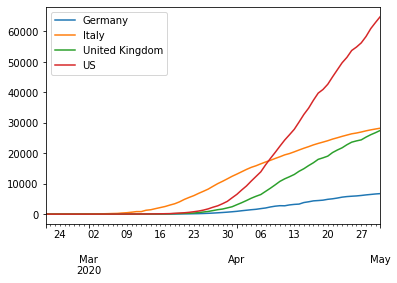

In [72]:
df4.plot()